In [1]:
%matplotlib  inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from franke import FrankeFunction, FrankePlot
from mpl_toolkits.mplot3d import Axes3D
import tools

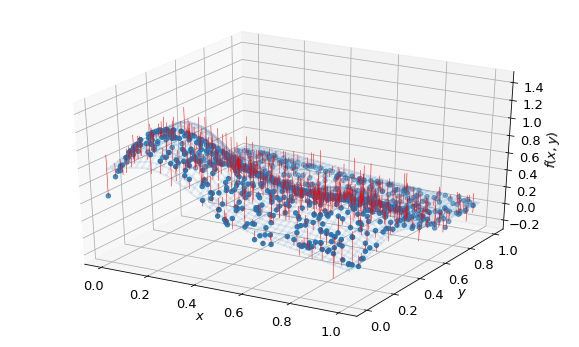

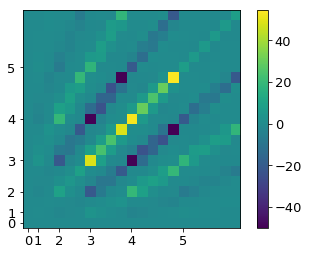

In [74]:
N = 1000
x = np.random.random(size = N)
y = np.random.random(size = N)
noise = 0.1
z = FrankeFunction(x,y) + np.random.normal(0,noise,size = x.size)

deg = 5

def get_X_poly2D(x,y,deg):
    X = []
    for i in range(deg + 1):
        for n in range(i+1):
            X.append(x**n * y**(i-n))
    X = np.array(X).T
    return X

def fit_poly2D(x,y,z, deg = 5, lmbd = 0):
    X = get_X_poly2D(x,y,deg)
    regr = tools.Regression(X,z, lmbd = lmbd)
    return regr


regr = fit_poly2D(x, y, z, deg = deg, lmbd = 0)

zhat = regr.yhat
beta = regr.beta

plt.rcParams.update({'font.size': 13})
fig = plt.figure(figsize = [10,6])
ax = fig.add_subplot(111,projection = '3d')


for i in range(x.size):
    ax.plot([x[i],x[i]],
            [y[i],y[i]],
            [z[i],zhat[i]], c = 'r', lw = 0.5, zorder = 10)
ax.scatter(x,y,zhat)
    
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

FrankePlot(ax)
ax.view_init(30, 60)

std_beta = np.sqrt(np.diag(regr.betaVar))
i = 0

print_beta = False
if print_beta:
    for n in range(deg+1):
        for m in range(deg+1-n):
            print(f"x**{n} y**{m}  {beta[i]:5.2f}   {std_beta[i]:5.2f}")
            i+=1
        
# plt.figure()
fig, ax = plt.subplots(1)
m = ax.imshow(regr.betaVar, origin='lower')

orders = list(range(deg+1))
ax.set_xticks(np.cumsum(orders))
ax.set_xticklabels(orders)

ax.set_yticks(np.cumsum(orders))
ax.set_yticklabels(orders)

plt.colorbar(m)

In [70]:
regr.R2Score()

0.85919255879536149

In [89]:
def k_fold_val(x, y, z, k = 2, lmbd=0):
    N = x.size
    if N%k:
        raise ValueError('N must be divisible by k')
    chunk_size = int(N/k)
    
    for i in range(k):
        x_test = x[:chunk_size]
        y_test = y[:chunk_size]
        z_test = z[:chunk_size]
        x_train = x[chunk_size:]
        y_train = y[chunk_size:]
        z_train = z[chunk_size:]
        print(x_test.size, x_train.size)
        
        regr = fit_poly2D(x_train, y_train, z_train)
        X_test = get_X_poly2D(x_test, y_test, deg =5)
        z_pred = regr.predict(X_test)
        print(f"train  {regr.R2Score():6.3f}  {regr.squared_error():6.3f}", )
        print(f"test   {tools.R2Score(z_test,z_pred):6.3f}  {tools.squared_error(z_test, z_pred):6.3f}", )
        
        x = np.roll(x, chunk_size)
        y = np.roll(y, chunk_size)
        z = np.roll(z, chunk_size)
        
k_fold_val(x,y,z, k = 20)

def bootstrap(x, y, z, k = 2, lmbd=0):
    N = x.size
    if N%k:
        raise ValueError('N must be divisible by k')
    chunk_size = int(N/k)
    indexes = np.arange(N)
    
    for i in range(k):
        x_test = x[:chunk_size]
        y_test = y[:chunk_size]
        z_test = z[:chunk_size]
        x_train = x[chunk_size:]
        y_train = y[chunk_size:]
        z_train = z[chunk_size:]
        print(x_test.size, x_train.size)
        
        regr = fit_poly2D(x_train, y_train, z_train)
        X_test = get_X_poly2D(x_test, y_test, deg =5)
        z_pred = regr.predict(X_test)
        
        print(f"train  {regr.R2Score():6.3f}  {regr.squared_error():6.3f}", )
        print(f"test   {tools.R2Score(z_test,z_pred):6.3f}  {tools.squared_error(z_test, z_pred):6.3f}", )
        
        x = np.roll(x, chunk_size)
        y = np.roll(y, chunk_size)
        z = np.roll(z, chunk_size)

50 950
train   0.875   0.011
test    0.830   0.011
50 950
train   0.874   0.011
test    0.857   0.015
50 950
train   0.872   0.011
test    0.892   0.011
50 950
train   0.874   0.011
test    0.868   0.011
50 950
train   0.875   0.011
test    0.841   0.015
50 950
train   0.875   0.011
test    0.833   0.012
50 950
train   0.873   0.012
test    0.875   0.009
50 950
train   0.873   0.011
test    0.886   0.011
50 950
train   0.871   0.012
test    0.912   0.009
50 950
train   0.871   0.012
test    0.916   0.009
50 950
train   0.874   0.011
test    0.850   0.013
50 950
train   0.874   0.012
test    0.853   0.009
50 950
train   0.874   0.011
test    0.859   0.014
50 950
train   0.874   0.011
test    0.853   0.010
50 950
train   0.876   0.011
test    0.829   0.017
50 950
train   0.871   0.012
test    0.917   0.008
50 950
train   0.875   0.011
test    0.830   0.018
50 950
train   0.872   0.012
test    0.903   0.009
50 950
train   0.876   0.011
test    0.782   0.014
50 950
train   0.874   0.011
te

In [101]:
indexes = np.arange(100)

choice = np.random.choice(indexes, 10, replace=True)
indexes[choice]

array([83, 25, 50, 93, 37, 48, 13, 57,  7, 17])

In [ ]:
bool(ax)